In [51]:
# Steven Pham
# T-TH Class
# Unit 6 | Assignment - What's the Weather Like?
# 2018 March 1

# Analysis

- The higher the latitude, the lower the temperature gets. This is because each point higher is getting closer to the north pole, which gives it a downward curve pattern with increasing latitude.
    - Citipy relies on nearest city. Perhaps this is why there is a lack of southern cities to have a results from regions below -40. 


- Wind speeds are stable around 0-10 mphs among all latitude numbers. However, there is a clear pattern for outliers, as the outliers has a increasing pattern of higher wind speeds as latitude increases. 
    

- Humdity is concentratred heavily between 80-100% However, there are more outliers with lower humdities (in the lower 40% humdity range) around 0-25 latitude. 

In [52]:
# Import Dependencies
import requests as req
import json
from citipy import citipy
from random import uniform
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [18]:
# API config info
api_key = "2bfb4461629a2f57b3ed258345c343b9"

# Current weather data URL: 
# http://api.openweathermap.org/data/2.5/weather?q={city name},{country code}&appid=2bfb4461629a2f57b3ed258345c343b9
url = "http://api.openweathermap.org/data/2.5/weather?"

In [19]:
# Functions for generating random latitude
def randLat():
   return uniform(-90, 90)

# Function for generating random longitude
def randLong():
   return uniform(-180,180)

In [20]:
# Creating Dataframe
weather_data_df = pd.DataFrame(columns=["City","Country","Temperature (F)","Humidity (%)","Cloudiness(%)","Wind Speed (mph)", "Latitude"])

# Creating Query Counter
counter = 1


print("==========================")
print("Starting Data Retrieval")
print("==========================")


# Loop Summary:
# Loop will run and add data to weather dataframe and will end if length . 
# Each iteration of loop will drop duplicates (if any)
# The loop will continue until it reaches the limit

while len(weather_data_df) != 500:
        
    # grabbing city with random lat lng
    city = citipy.nearest_city(randLat(), randLong())

    # cleaning city - replacing spaces with +
    cleanCity = city.city_name.replace(" ", "+")

    # compiling and running URL and converting to JSON
    compile_URL = url + "appid=" + api_key + "&q=" + cleanCity + "," + city.country_code + "&units=imperial"
    weather_response = req.get(compile_URL)
    weather_json = weather_response.json()


    # Run this if loop only json returns a 200 (success code) 
    if weather_json["cod"] == 200:
    
        # add to weather DF
        weather_data_df = weather_data_df.append([{"City": weather_json["name"],
                                                   "Country": weather_json["sys"]["country"],
                                                   "Temperature (F)": weather_json["main"]["temp"],
                                                   "Humidity (%)": weather_json["main"]["humidity"],
                                                   "Cloudiness(%)": weather_json["clouds"]["all"],
                                                   "Wind Speed (mph)": weather_json["wind"]["speed"],
                                                   "Latitude": weather_json["coord"]["lat"]
                                                   }])
        # Outputting to console 
        print("Processing Query " +str(counter) +"    |    ID# " +str(weather_json["id"]) + "      City: " + str(weather_json["name"]))
        print(compile_URL)
    
        # Incrementing by 1 to count query in console 
        counter = counter + 1
        
        # Will drop any duplicates (and ensure loop will continue if there are dupes found)
        weather_data_df = weather_data_df.drop_duplicates(['City'])
    
        
print("==========================")
print("Data Processing Complete")
print("==========================")

Starting Data Retrieval
Processing Query 1    |    ID# 2108502      City: Honiara
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=honiara,sb&units=imperial
Processing Query 2    |    ID# 3874787      City: Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=punta+arenas,cl&units=imperial
Processing Query 3    |    ID# 6320062      City: Vila Velha
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=vila+velha,br&units=imperial
Processing Query 4    |    ID# 3448454      City: Belmonte
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=belmonte,br&units=imperial
Processing Query 5    |    ID# 3833367      City: Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=ushuaia,ar&units=imperial
Processing Query 6    |    ID# 4252975      City: Barrow
http://api.openweathermap.org/data/2.5/we

Processing Query 49    |    ID# 2071860      City: Esperance
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=esperance,au&units=imperial
Processing Query 50    |    ID# 934322      City: Mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=mahebourg,mu&units=imperial
Processing Query 51    |    ID# 4252975      City: Barrow
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=barrow,us&units=imperial
Processing Query 52    |    ID# 931755      City: Blantyre
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=blantyre,mw&units=imperial
Processing Query 53    |    ID# 6180550      City: Whitehorse
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=whitehorse,ca&units=imperial
Processing Query 54    |    ID# 1040938      City: Manjacaze
http://api.openweathermap.org/data/2.5/weather?appid=2bfb44616

Processing Query 96    |    ID# 4235193      City: Carbondale
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=carbondale,us&units=imperial
Processing Query 97    |    ID# 2112802      City: Hasaki
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=hasaki,jp&units=imperial
Processing Query 98    |    ID# 546105      City: Nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=nikolskoye,ru&units=imperial
Processing Query 99    |    ID# 4020109      City: Atuona
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=atuona,pf&units=imperial
Processing Query 100    |    ID# 3698359      City: Chicama
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=chicama,pe&units=imperial
Processing Query 101    |    ID# 3347019      City: Namibe
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f5

Processing Query 143    |    ID# 2077963      City: Albany
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=albany,au&units=imperial
Processing Query 144    |    ID# 107304      City: Buraydah
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=buraydah,sa&units=imperial
Processing Query 145    |    ID# 2075265      City: Busselton
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=busselton,au&units=imperial
Processing Query 146    |    ID# 3833367      City: Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=ushuaia,ar&units=imperial
Processing Query 147    |    ID# 3652567      City: San Cristobal
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=san+cristobal,ec&units=imperial
Processing Query 148    |    ID# 2077963      City: Albany
http://api.openweathermap.org/data/2.5/weather?appid=2bf

Processing Query 190    |    ID# 610529      City: Atyrau
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=atyrau,kz&units=imperial
Processing Query 191    |    ID# 3366880      City: Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=hermanus,za&units=imperial
Processing Query 192    |    ID# 4732862      City: Nome
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=nome,us&units=imperial
Processing Query 193    |    ID# 3652764      City: Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=puerto+ayora,ec&units=imperial
Processing Query 194    |    ID# 2112802      City: Hasaki
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=hasaki,jp&units=imperial
Processing Query 195    |    ID# 1259385      City: Port Blair
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2

Processing Query 237    |    ID# 3372707      City: Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=ribeira+grande,pt&units=imperial
Processing Query 238    |    ID# 1259385      City: Port Blair
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=port+blair,in&units=imperial
Processing Query 239    |    ID# 1503037      City: Kodinsk
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=kodinsk,ru&units=imperial
Processing Query 240    |    ID# 2206939      City: Bluff
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=bluff,nz&units=imperial
Processing Query 241    |    ID# 2077963      City: Albany
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=albany,au&units=imperial
Processing Query 242    |    ID# 1106677      City: Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?a

Processing Query 284    |    ID# 57000      City: Hobyo
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=hobyo,so&units=imperial
Processing Query 285    |    ID# 3703523      City: Palmas Bellas
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=palmas+bellas,pa&units=imperial
Processing Query 286    |    ID# 3370903      City: Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=jamestown,sh&units=imperial
Processing Query 287    |    ID# 3855065      City: General Roca
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=general+roca,ar&units=imperial
Processing Query 288    |    ID# 1006984      City: East London
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=east+london,za&units=imperial
Processing Query 289    |    ID# 3440777      City: Rocha
http://api.openweathermap.org/data/2.5/weath

Processing Query 331    |    ID# 3896218      City: Castro
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=castro,cl&units=imperial
Processing Query 332    |    ID# 2136825      City: Isangel
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=isangel,vu&units=imperial
Processing Query 333    |    ID# 2163355      City: Hobart
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=hobart,au&units=imperial
Processing Query 334    |    ID# 2163355      City: Hobart
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=hobart,au&units=imperial
Processing Query 335    |    ID# 2267254      City: Lagoa
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=lagoa,pt&units=imperial
Processing Query 336    |    ID# 5848280      City: Kapaa
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c34

Processing Query 378    |    ID# 1217734      City: Boysun
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=boysun,uz&units=imperial
Processing Query 379    |    ID# 3833367      City: Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=ushuaia,ar&units=imperial
Processing Query 380    |    ID# 6167817      City: Torbay
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=torbay,ca&units=imperial
Processing Query 381    |    ID# 1082243      City: Ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=ambilobe,mg&units=imperial
Processing Query 382    |    ID# 304854      City: Manavgat
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=manavgat,tr&units=imperial
Processing Query 383    |    ID# 6185377      City: Yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f

Processing Query 426    |    ID# 3491161      City: Bull Savanna
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=bull+savanna,jm&units=imperial
Processing Query 427    |    ID# 1788268      City: Dongsheng
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=dongsheng,cn&units=imperial
Processing Query 428    |    ID# 934322      City: Mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=mahebourg,mu&units=imperial
Processing Query 429    |    ID# 2630299      City: Hofn
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=hofn,is&units=imperial
Processing Query 430    |    ID# 5880568      City: Bethel
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=bethel,us&units=imperial
Processing Query 431    |    ID# 3698359      City: Chicama
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461

Processing Query 473    |    ID# 964420      City: Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=port+elizabeth,za&units=imperial
Processing Query 474    |    ID# 2181625      City: Te Anau
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=te+anau,nz&units=imperial
Processing Query 475    |    ID# 2208248      City: Kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=kaitangata,nz&units=imperial
Processing Query 476    |    ID# 5983720      City: Iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=iqaluit,ca&units=imperial
Processing Query 477    |    ID# 2065594      City: Mount Isa
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=mount+isa,au&units=imperial
Processing Query 478    |    ID# 1850144      City: Nishihara
http://api.openweathermap.org/data/2.5/weathe

Processing Query 520    |    ID# 5563839      City: Fortuna
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=fortuna,us&units=imperial
Processing Query 521    |    ID# 2077963      City: Albany
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=albany,au&units=imperial
Processing Query 522    |    ID# 1015776      City: Bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=bredasdorp,za&units=imperial
Processing Query 523    |    ID# 4030556      City: Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=rikitea,pf&units=imperial
Processing Query 524    |    ID# 3380290      City: Sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=sinnamary,gf&units=imperial
Processing Query 525    |    ID# 3370903      City: Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=2bfb446

Processing Query 567    |    ID# 2180815      City: Tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=tuatapere,nz&units=imperial
Processing Query 568    |    ID# 2206939      City: Bluff
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=bluff,nz&units=imperial
Processing Query 569    |    ID# 5972291      City: Havre-Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=havre-saint-pierre,ca&units=imperial
Processing Query 570    |    ID# 1519691      City: Sarkand
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=sarkand,kz&units=imperial
Processing Query 571    |    ID# 3833367      City: Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=ushuaia,ar&units=imperial
Processing Query 572    |    ID# 2163355      City: Hobart
http://api.openweathermap.org/data/2.5/weather?ap

Processing Query 614    |    ID# 2126123      City: Chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=chokurdakh,ru&units=imperial
Processing Query 615    |    ID# 934322      City: Mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=mahebourg,mu&units=imperial
Processing Query 616    |    ID# 2729907      City: Longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=longyearbyen,sj&units=imperial
Processing Query 617    |    ID# 1219649      City: Turkmenabat
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=turkmenabat,tm&units=imperial
Processing Query 618    |    ID# 3369157      City: Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=cape+town,za&units=imperial
Processing Query 619    |    ID# 2392308      City: Ouidah
http://api.openweathermap.org/data/2.5/w

Processing Query 661    |    ID# 241131      City: Victoria
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=victoria,sc&units=imperial
Processing Query 662    |    ID# 2077963      City: Albany
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=albany,au&units=imperial
Processing Query 663    |    ID# 4032243      City: Vaini
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=vaini,to&units=imperial
Processing Query 664    |    ID# 4031574      City: Provideniya
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=provideniya,ru&units=imperial
Processing Query 665    |    ID# 2652437      City: Consett
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=consett,gb&units=imperial
Processing Query 666    |    ID# 2075265      City: Busselton
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a

Processing Query 709    |    ID# 2152668      City: Portland
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=portland,au&units=imperial
Processing Query 710    |    ID# 3366880      City: Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=hermanus,za&units=imperial
Processing Query 711    |    ID# 5703670      City: Elko
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=elko,us&units=imperial
Processing Query 712    |    ID# 4030556      City: Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=rikitea,pf&units=imperial
Processing Query 713    |    ID# 3441894      City: Maldonado
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=maldonado,uy&units=imperial
Processing Query 714    |    ID# 3421765      City: Nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a

Processing Query 757    |    ID# 3466165      City: Cidreira
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=cidreira,br&units=imperial
Processing Query 758    |    ID# 3833367      City: Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=ushuaia,ar&units=imperial
Processing Query 759    |    ID# 2152668      City: Portland
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=portland,au&units=imperial
Processing Query 760    |    ID# 2022572      City: Khatanga
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=khatanga,ru&units=imperial
Processing Query 761    |    ID# 3874787      City: Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=punta+arenas,cl&units=imperial
Processing Query 762    |    ID# 2155415      City: New Norfolk
http://api.openweathermap.org/data/2.5/weather?app

Processing Query 804    |    ID# 3833367      City: Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=ushuaia,ar&units=imperial
Processing Query 805    |    ID# 4035715      City: Avarua
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=avarua,ck&units=imperial
Processing Query 806    |    ID# 370481      City: Marawi
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=marawi,sd&units=imperial
Processing Query 807    |    ID# 3369157      City: Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=cape+town,za&units=imperial
Processing Query 808    |    ID# 2013639      City: Verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=verkhnevilyuysk,ru&units=imperial
Processing Query 809    |    ID# 3382160      City: Cayenne
http://api.openweathermap.org/data/2.5/weather?appid=2b

Processing Query 851    |    ID# 3939168      City: Huarmey
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=huarmey,pe&units=imperial
Processing Query 852    |    ID# 2206939      City: Bluff
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=bluff,nz&units=imperial
Processing Query 853    |    ID# 2135517      City: Norsup
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=norsup,vu&units=imperial
Processing Query 854    |    ID# 3831208      City: Qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=qaanaaq,gl&units=imperial
Processing Query 855    |    ID# 3443061      City: Chuy
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=chuy,uy&units=imperial
Processing Query 856    |    ID# 2022572      City: Khatanga
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c3

Processing Query 899    |    ID# 2033196      City: Zhangjiakou
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=zhangjiakou,cn&units=imperial
Processing Query 900    |    ID# 935215      City: Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=saint-philippe,re&units=imperial
Processing Query 901    |    ID# 3874787      City: Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=punta+arenas,cl&units=imperial
Processing Query 902    |    ID# 3424934      City: Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=saint-pierre,pm&units=imperial
Processing Query 903    |    ID# 1015776      City: Bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=bredasdorp,za&units=imperial
Processing Query 904    |    ID# 3833367      City: Ushuaia
http://api.openweatherm

Processing Query 945    |    ID# 4579662      City: Georgetown
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=georgetown,us&units=imperial
Processing Query 946    |    ID# 2014833      City: Tura
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=tura,ru&units=imperial
Processing Query 947    |    ID# 1523662      City: Kachiry
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=kachiry,kz&units=imperial
Processing Query 948    |    ID# 519630      City: Novaya Ladoga
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=novaya+ladoga,ru&units=imperial
Processing Query 949    |    ID# 3874787      City: Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=punta+arenas,cl&units=imperial
Processing Query 950    |    ID# 4030556      City: Rikitea
http://api.openweathermap.org/data/2.5/weather?ap

Processing Query 992    |    ID# 1636308      City: Manokwari
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=manokwari,id&units=imperial
Processing Query 993    |    ID# 4030556      City: Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=rikitea,pf&units=imperial
Processing Query 994    |    ID# 4030556      City: Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=rikitea,pf&units=imperial
Processing Query 995    |    ID# 2126123      City: Chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=chokurdakh,ru&units=imperial
Processing Query 996    |    ID# 2654970      City: Brae
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=brae,gb&units=imperial
Processing Query 997    |    ID# 3833367      City: Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2

Processing Query 1040    |    ID# 1278698      City: Amudalavalasa
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=amudalavalasa,in&units=imperial
Processing Query 1041    |    ID# 3448903      City: Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=sao+joao+da+barra,br&units=imperial
Processing Query 1042    |    ID# 7671223      City: Kloulklubed
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=kloulklubed,pw&units=imperial
Processing Query 1043    |    ID# 583345      City: Aleksandrov Gay
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=aleksandrov+gay,ru&units=imperial
Processing Query 1044    |    ID# 2206939      City: Bluff
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=bluff,nz&units=imperial
Processing Query 1045    |    ID# 2022572      City: Khatanga
http://api.o

Processing Query 1088    |    ID# 2074865      City: Carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=carnarvon,au&units=imperial
Processing Query 1089    |    ID# 2125693      City: Evensk
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=evensk,ru&units=imperial
Processing Query 1090    |    ID# 5848280      City: Kapaa
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=kapaa,us&units=imperial
Processing Query 1091    |    ID# 3369157      City: Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=cape+town,za&units=imperial
Processing Query 1092    |    ID# 3833367      City: Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=ushuaia,ar&units=imperial
Processing Query 1093    |    ID# 6170031      City: Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4

Processing Query 1134    |    ID# 2121385      City: Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=severo-kurilsk,ru&units=imperial
Processing Query 1135    |    ID# 241131      City: Victoria
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=victoria,sc&units=imperial
Processing Query 1136    |    ID# 6185377      City: Yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=yellowknife,ca&units=imperial
Processing Query 1137    |    ID# 80509      City: Bardiyah
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=bardiyah,ly&units=imperial
Processing Query 1138    |    ID# 3899695      City: Ancud
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=ancud,cl&units=imperial
Processing Query 1139    |    ID# 2125693      City: Evensk
http://api.openweathermap.org/data/2.5/weather

Processing Query 1181    |    ID# 3985710      City: Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=cabo+san+lucas,mx&units=imperial
Processing Query 1182    |    ID# 6170031      City: Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=tuktoyaktuk,ca&units=imperial
Processing Query 1183    |    ID# 3694178      City: Pacasmayo
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=pacasmayo,pe&units=imperial
Processing Query 1184    |    ID# 6111862      City: Port Hardy
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=port+hardy,ca&units=imperial
Processing Query 1185    |    ID# 584051      City: Svetlogorsk
http://api.openweathermap.org/data/2.5/weather?appid=2bfb4461629a2f57b3ed258345c343b9&q=svetlogorsk,ru&units=imperial
Processing Query 1186    |    ID# 3424934      City: Saint-Pierre
http://api.openweath

In [53]:
# Sanity Check
# Making sure all 500 is there, since it took forever to run
weather_data_df.count()

City                500
Country             500
Temperature (F)     500
Humidity (%)        500
Cloudiness(%)       500
Wind Speed (mph)    500
Latitude            500
dtype: int64

In [54]:
weather_data_df.head()

,City,Country,Temperature (F),Humidity (%),Cloudiness(%),Wind Speed (mph),Latitude
0,Honiara,SB,82.4,78,40,4.70,-9.43
0,Punta Arenas,CL,59.0,51,0,23.04,-53.16
0,Vila Velha,BR,77.0,94,75,3.36,-3.71
0,Belmonte,BR,71.0,94,92,3.62,-26.84
0,Ushuaia,AR,53.6,71,75,9.17,-54.81


# Temperature (F) vs. Latitude

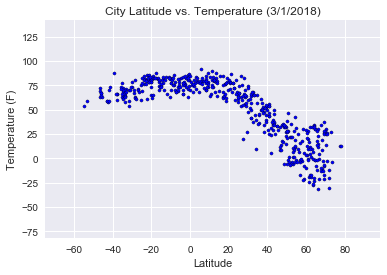

In [55]:
# Setting basic parameters of table (title, x/y label)
plt.title("City Latitude vs. Temperature (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Setting outer limits of x and y (+/- 20 from max/min values for a cleaner look)
plt.xlim(min(weather_data_df["Latitude"])-20, max(weather_data_df["Latitude"]) + 20)
plt.ylim(min(weather_data_df["Temperature (F)"])-50, max(weather_data_df["Temperature (F)"]) + 50)

# Create the graph
plt.scatter(weather_data_df["Latitude"], weather_data_df["Temperature (F)"], s =10, edgecolor = "black", c = "blue")

# Using Seaborn + Outputting the table
sns.set()
plt.show()

# Humidity (%) vs. Latitude

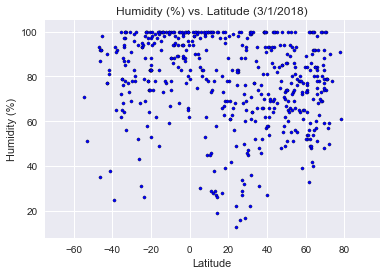

In [56]:
# Setting basic parameters of table (title, x/y label)
plt.title("Humidity (%) vs. Latitude (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Setting outer limits of x and y - adjusting for percentage graph
plt.xlim(min(weather_data_df["Latitude"])-20, max(weather_data_df["Latitude"]) + 20)
plt.ylim(min(weather_data_df["Humidity (%)"])-5, max(weather_data_df["Humidity (%)"]) + 5)

# Create the graph
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity (%)"], s =10, edgecolor = "black", c = "blue")

# Using Seaborn + Outputting the table
sns.set()
plt.show()

# Cloudiness (%) vs. Latitude

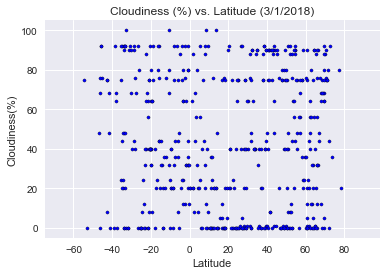

In [57]:
# Setting basic parameters of table (title, x/y label)
plt.title("Cloudiness (%) vs. Latitude (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Setting outer limits of x and y - adjusting for percentage graph
plt.xlim(min(weather_data_df["Latitude"])-20, max(weather_data_df["Latitude"]) + 20)
plt.ylim(min(weather_data_df["Cloudiness(%)"])-5, max(weather_data_df["Cloudiness(%)"]) + 5)

# Create the graph
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness(%)"], s =10, edgecolor = "black", c = "blue")

# Using Seaborn + Outputting the table
sns.set()
plt.show()

# Wind Speed (mph) vs. Latitude

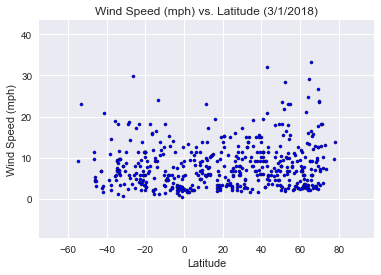

In [58]:
# Setting basic parameters of table (title, x/y label)
plt.title("Wind Speed (mph) vs. Latitude (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Setting outer limits of x and y (+/- 20 from max/min values for a cleaner look)
plt.xlim(min(weather_data_df["Latitude"])-20, max(weather_data_df["Latitude"]) + 20)
plt.ylim(min(weather_data_df["Wind Speed (mph)"])- 10, max(weather_data_df["Wind Speed (mph)"]) + 10)

# Create the graph
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed (mph)"], s =10, edgecolor = "black", c = "blue")

# Using Seaborn + Outputting the table
sns.set()
plt.show()

In [60]:
# Outputting DF to CSV
weather_data_df.to_csv("Weather_Output.csv", encoding= "utf-8" , index=False)